In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.0.0_full_model_no_x_factor/ciff_sam/2022_03_04_17_34_48/count_data/'

In [3]:
figname = 'model_7.0.0'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [5]:
ddpt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
ddpt

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,preventative_zinc,therapeutic_zinc,wasting_state,age
0,0,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.000000,covered,covered,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.480493,uncovered,covered,susceptible_to_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.000000,covered,uncovered,susceptible_to_child_wasting,early_neonatal
3,3,female,2022,diarrheal_diseases,state_person_time,29,baseline,2.258727,uncovered,uncovered,susceptible_to_child_wasting,early_neonatal
4,4,female,2022,diarrheal_diseases,state_person_time,29,baseline,0.000000,covered,covered,mild_child_wasting,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...
126715,126715,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,174.346338,uncovered,uncovered,moderate_acute_malnutrition,2_to_4
126716,126716,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,276.626968,covered,covered,severe_acute_malnutrition,2_to_4
126717,126717,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,0.000000,uncovered,covered,severe_acute_malnutrition,2_to_4
126718,126718,male,2026,susceptible_to_diarrheal_diseases,state_person_time,946,zinc_supplementation,0.000000,covered,uncovered,severe_acute_malnutrition,2_to_4


# first check coverage of each intervention

In [6]:
cp = ddpt.groupby(['input_draw','scenario','year','preventative_zinc']).sum()
ctot = cp.groupby(['input_draw','scenario','year']).sum()
cpzinc = (cp/ctot).groupby(['scenario','year','preventative_zinc']).describe(percentiles=[0.025,0.975])[['value']]
cpzinc.head()

value                                    
                                count mean  std  min 2.5%  50% 97.5%  max
scenario year preventative_zinc                                          
baseline 2022 covered            11.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
              uncovered          11.0  1.0  0.0  1.0  1.0  1.0   1.0  1.0
         2023 covered            11.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
              uncovered          11.0  1.0  0.0  1.0  1.0  1.0   1.0  1.0
         2024 covered            11.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0

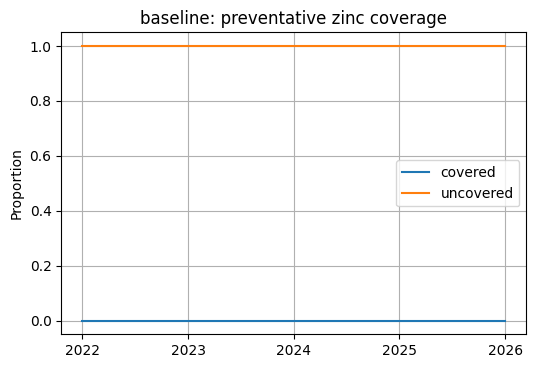

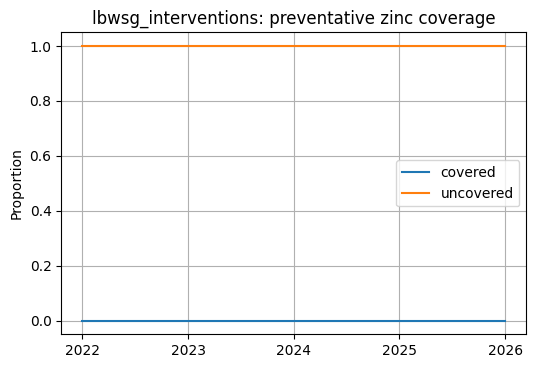

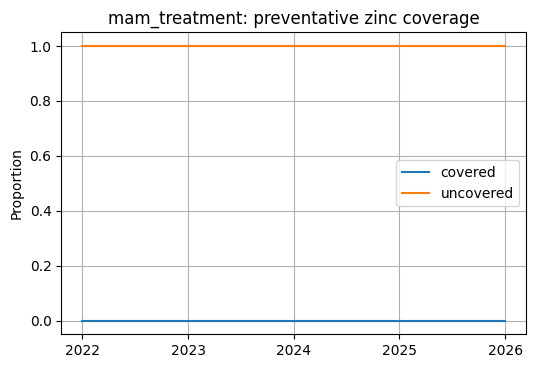

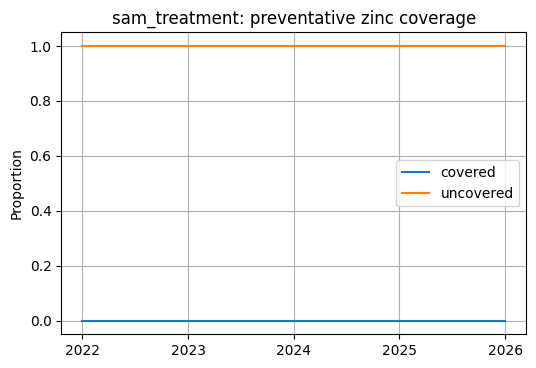

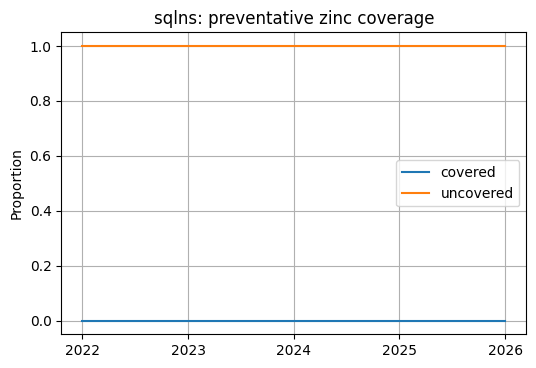

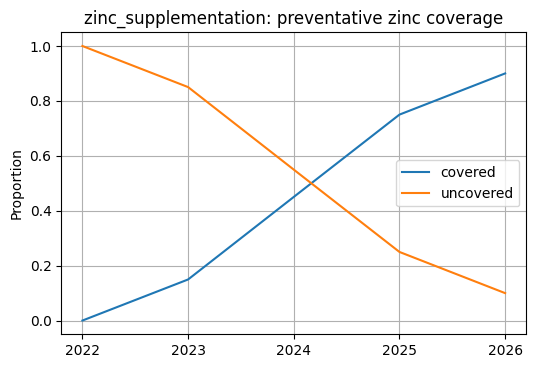

In [7]:
for scenario in cpzinc.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in cpzinc.reset_index().preventative_zinc.unique():
        p = cpzinc.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.preventative_zinc==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    #plt.ylim(0,1)
    plt.title(f'{scenario}: preventative zinc coverage')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# looks good!

In [8]:
ct = ddpt.groupby(['input_draw','scenario','year','therapeutic_zinc']).sum()
ctot = ct.groupby(['input_draw','scenario','year']).sum()
ctzinc = (ct/ctot).groupby(['scenario','year','therapeutic_zinc']).describe(percentiles=[0.025,0.975])[['value']]
ctzinc.head()

value                                          \
                               count      mean       std       min      2.5%   
scenario year therapeutic_zinc                                                 
baseline 2022 covered           11.0  0.469859  0.166805  0.207080  0.209467   
              uncovered         11.0  0.530141  0.166805  0.308633  0.312773   
         2023 covered           11.0  0.469822  0.166985  0.206704  0.208960   
              uncovered         11.0  0.530178  0.166985  0.309096  0.313193   
         2024 covered           11.0  0.469691  0.166657  0.207255  0.209382   

                                                              
                                     50%     97.5%       max  
scenario year therapeutic_zinc                                
baseline 2022 covered           0.432239  0.687227  0.691367  
              uncovered         0.567761  0.790533  0.792920  
         2023 covered           0.431315  0.686807  0.690904  
              uncovered         0.568685  0.791040  0.793296  
         2024 covered           0.430109  0.686014  0.689686

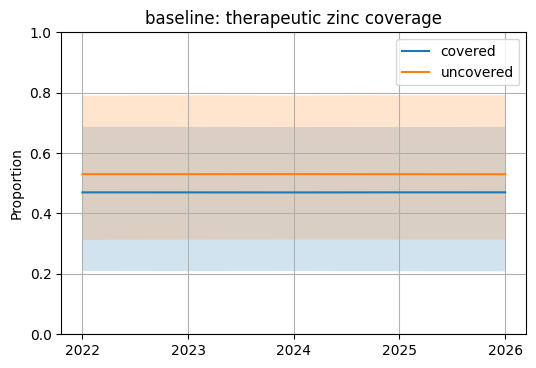

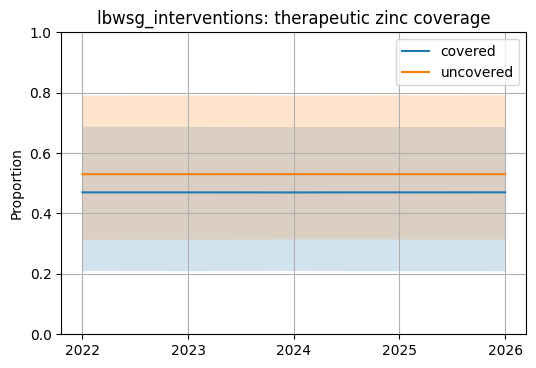

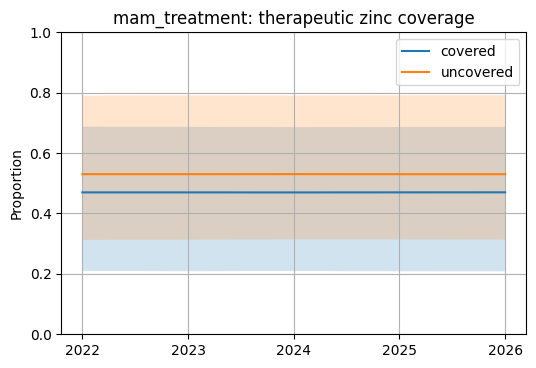

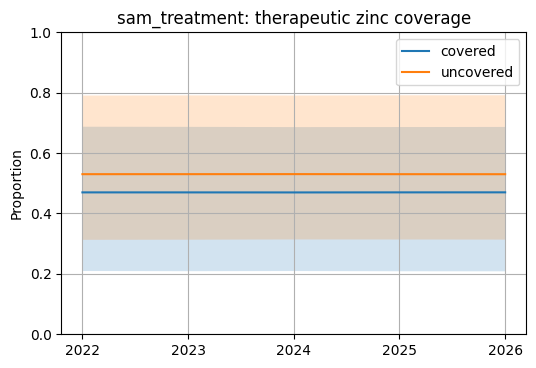

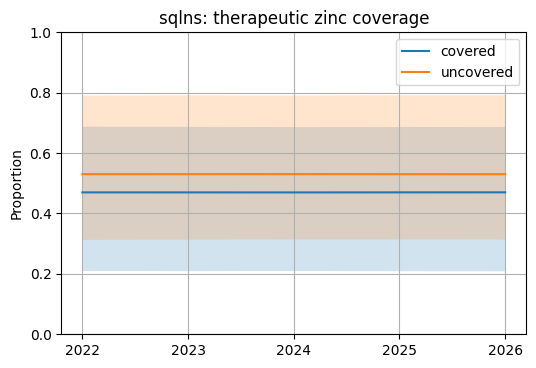

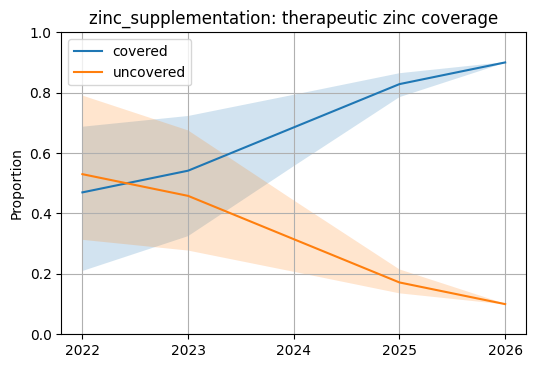

In [9]:
for scenario in ctzinc.reset_index().scenario.unique():
    plt.figure(dpi=100)
    for regimen in ctzinc.reset_index().therapeutic_zinc.unique():
        p = ctzinc.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.therapeutic_zinc==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}: therapeutic zinc coverage')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# looks good!

# next let's check joint coverage of each intervention

In [10]:
# check to see that among those covered by preventative zinc, 100% are covered by thera. zinc

data = ddpt.loc[(ddpt.preventative_zinc=='covered')&(ddpt.scenario=='zinc_supplementation')]
data = data.groupby(['input_draw','therapeutic_zinc']).sum().reset_index()
assert np.all(data.loc[data.therapeutic_zinc=='uncovered']['value']==0)

# great!

# now look at impact of preventative zinc coverage on diarrheal disease incidence

In [11]:
ddtrans = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')

In [12]:
dd_incidence = ((ddtrans.loc[(ddtrans.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')
                            &(ddtrans.scenario=='zinc_supplementation')]
                .groupby(['age','sex','input_draw','scenario','preventative_zinc']).sum()[['value']])
                / (ddpt.loc[(ddpt.cause=='susceptible_to_diarrheal_diseases')
                           &(ddpt.scenario=='zinc_supplementation')]
                  .groupby(['age','sex','input_draw','scenario','preventative_zinc']).sum()[['value']])).reset_index()
                
dd_incidence_covered = dd_incidence.loc[dd_incidence.preventative_zinc=='covered'].set_index(['age','sex','input_draw'])[['value']]
dd_incidence_uncovered = dd_incidence.loc[dd_incidence.preventative_zinc=='uncovered'].set_index(['age','sex','input_draw'])[['value']]
dd_incidence_rr = dd_incidence_covered / dd_incidence_uncovered
dd_incidence_rr.groupby(['age','sex']).describe(percentiles=[0.025,0.975])

# validation target: 0.89 (95% CI: 0.82, 0.97; lognormal distribution of cuncertainty) 
# we're looking a bit optimistic in the effect

value                                          \
                       count      mean       std       min      2.5%   
age             sex                                                    
1-5_months      female  11.0  0.872690  0.041483  0.798808  0.804928   
                male    11.0  0.871128  0.037455  0.799698  0.804948   
12_to_23_months female  11.0  0.864753  0.039949  0.801027  0.803724   
                male    11.0  0.854422  0.037688  0.799683  0.800184   
2_to_4          female  11.0  0.858648  0.035709  0.801309  0.803716   
                male    11.0  0.855846  0.038383  0.797821  0.799543   
6-11_months     female  11.0  0.863391  0.042860  0.795428  0.798057   
                male    11.0  0.858463  0.040233  0.796001  0.797760   
early_neonatal  female  11.0  0.875008  0.058019  0.761177  0.771136   
                male    11.0  0.858419  0.038427  0.780441  0.788232   
late_neonatal   female  11.0  0.866540  0.032587  0.820544  0.824802   
                male    11.0  0.877791  0.043474  0.773020  0.791619   

                                                      
                             50%     97.5%       max  
age             sex                                   
1-5_months      female  0.879101  0.930594  0.933226  
                male    0.882460  0.915354  0.919708  
12_to_23_months female  0.875182  0.913280  0.915655  
                male    0.869807  0.904142  0.909229  
2_to_4          female  0.870510  0.901405  0.901503  
                male    0.867264  0.909885  0.915648  
6-11_months     female  0.873328  0.922207  0.923760  
                male    0.868015  0.914485  0.918615  
early_neonatal  female  0.897430  0.932941  0.935231  
                male    0.854818  0.910490  0.914473  
late_neonatal   female  0.857446  0.924066  0.931310  
                male    0.877822  0.928574  0.932116

# now effect of therapeutic zinc on diarrheal diseases remission

In [13]:
dd_remission = ((ddtrans.loc[(ddtrans.measure=='diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count')
                            &(ddtrans.scenario=='zinc_supplementation')]
                .groupby(['age','sex','input_draw','scenario','therapeutic_zinc']).sum()[['value']])
                / (ddpt.loc[(ddpt.cause=='diarrheal_diseases')
                           &(ddpt.scenario=='zinc_supplementation')]
                  .groupby(['age','sex','input_draw','scenario','therapeutic_zinc']).sum()[['value']]))#.reset_index()
dd_duration = (365/dd_remission).reset_index()           
dd_duration.head()

,age,sex,input_draw,scenario,therapeutic_zinc,value
0,1-5_months,female,29,zinc_supplementation,covered,4.161872
1,1-5_months,female,29,zinc_supplementation,uncovered,4.710268
2,1-5_months,female,232,zinc_supplementation,covered,4.478694
3,1-5_months,female,232,zinc_supplementation,uncovered,4.726453
4,1-5_months,female,357,zinc_supplementation,covered,4.336441


In [15]:
dd_duration_covered = dd_duration.loc[dd_duration.therapeutic_zinc=='covered'].set_index(['age','sex','input_draw'])[['value']]
dd_duration_uncovered = dd_duration.loc[dd_duration.therapeutic_zinc=='uncovered'].set_index(['age','sex','input_draw'])[['value']]
dd_duration_md = (dd_duration_covered - dd_duration_uncovered) * 24
dd_duration_md.groupby(['age','sex']).describe(percentiles=[0.025,0.975])

# validation target: -11.46 (95% CI: -19.72, -3.19; normal distribution of uncertainty)
# looks pretty good

value                                             \
                       count       mean       std        min       2.5%   
age             sex                                                       
1-5_months      female  11.0 -10.919779  3.946327 -20.397137 -18.600863   
                male    11.0 -11.711713  3.825227 -20.628238 -18.930697   
12_to_23_months female  11.0 -11.270932  3.628946 -20.887201 -18.984121   
                male    11.0 -11.018509  3.476469 -18.956457 -17.610427   
2_to_4          female  11.0 -11.130385  3.839393 -20.303688 -18.557415   
                male    11.0 -11.192298  3.793716 -19.838697 -18.286138   
6-11_months     female  11.0 -10.830765  4.161618 -21.088045 -18.955651   
                male    11.0 -11.499145  3.777908 -20.301269 -18.709939   
early_neonatal  female  11.0  -9.249170  6.307220 -19.180994 -18.990172   
                male    11.0  -8.972487  8.633947 -29.048144 -25.642915   
late_neonatal   female  11.0 -10.572173  4.661284 -17.887407 -17.578052   
                male    11.0  -9.363082  3.457390 -18.016196 -16.709479   

                                                       
                              50%     97.5%       max  
age             sex                                    
1-5_months      female -10.127980 -6.297833 -5.946218  
                male   -11.330047 -6.114444 -5.356601  
12_to_23_months female -10.203008 -7.718815 -7.482039  
                male   -10.975241 -6.565009 -6.032508  
2_to_4          female -10.998693 -5.996418 -5.587092  
                male   -10.435532 -6.271228 -5.786271  
6-11_months     female -10.698077 -5.067095 -4.216268  
                male   -11.345566 -7.412903 -7.236337  
early_neonatal  female  -7.011329 -1.591501 -1.471588  
                male    -6.127915  1.837636  2.731339  
late_neonatal   female -11.411059 -2.906365 -2.270150  
                male    -8.536779 -5.697480 -5.558486

In [19]:
dd_remission = ((ddtrans.loc[(ddtrans.measure=='diarrheal_diseases_to_susceptible_to_diarrheal_diseases_event_count')
                            &(ddtrans.scenario=='baseline')]
                .groupby(['age','sex','input_draw','scenario']).sum()[['value']])
                / (ddpt.loc[(ddpt.cause=='diarrheal_diseases')
                           &(ddpt.scenario=='baseline')]
                  .groupby(['age','sex','input_draw','scenario']).sum()[['value']]))#.reset_index()
dd_duration = (365/dd_remission).reset_index()           
dd_duration.head()

,age,sex,input_draw,scenario,value
0,1-5_months,female,29,baseline,4.603425
1,1-5_months,female,232,baseline,4.581104
2,1-5_months,female,357,baseline,4.579866
3,1-5_months,female,394,baseline,4.537042
4,1-5_months,female,524,baseline,4.570195
